## Meta-data

1. SPX (presumably S&P 500 index prices)
2. GLD (Gold prices)
3. USO (US Oil prices)
4. SLV (Silver prices)
5. EUR/USD (Euro to US Dollar exchange rate)

## Importing the Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing

In [8]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('./Dataset/gld_price_data.csv')

In [9]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [12]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<h3>Correlation:</h3>

1. Positive Correlation
2. Negative Correlation

In [15]:
# Assuming gold_data is your DataFrame containing the dataset
# Exclude the 'Date' column
numeric_data = gold_data.select_dtypes(include=['float64', 'int'])

In [16]:
numeric_data.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [17]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [18]:
correlation = numeric_data.corr() # .corr is used to find the pairwise correlation of all columns in the dataframe

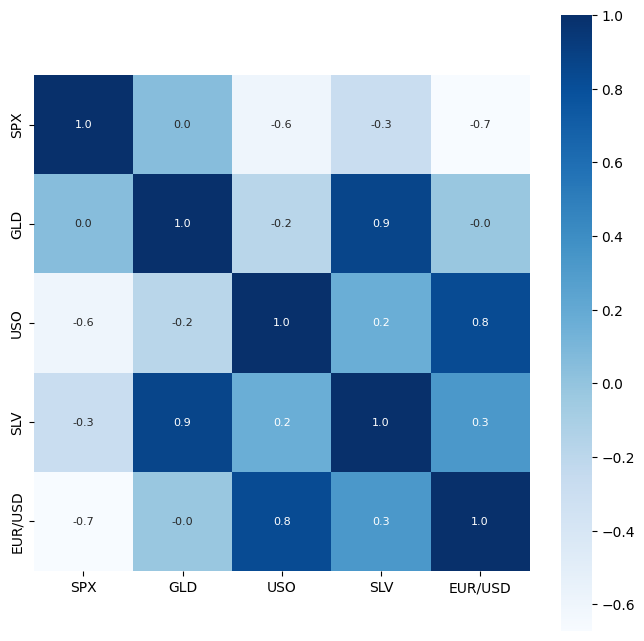

In [19]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

In [20]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64




<li>SPX (S&P 500 index): The correlation coefficient is 0.049345. This indicates a very weak positive correlation between GLD and SPX. It suggests that when the S&P 500 index goes up, the gold price also tends to go up slightly, but the relationship is not strong.</li>

<li>USO (US Oil prices): The correlation coefficient is -0.186360. This indicates a weak negative correlation between GLD and USO. It suggests that when the price of oil goes down, the price of gold slightly tends to increase, and vice versa. However, this relationship is not strong.</li>

<li>SLV (Silver prices): The correlation coefficient is 0.866632. This indicates a strong positive correlation between GLD and SLV. It suggests that gold and silver prices tend to move in the same direction. When the price of silver goes up, the price of gold is likely to go up as well, and this relationship is quite strong.</li>

<li>EUR/USD (Euro to US Dollar exchange rate): The correlation coefficient is -0.024375. This indicates a very weak negative correlation between GLD and EUR/USD. It suggests that there is virtually no meaningful relationship between the movements in the gold price and the Euro to US Dollar exchange rate</li>

C:\Users\InkoHamza\AppData\Local\Temp\ipykernel_23024\3113489411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='blue')


<Axes: xlabel='GLD', ylabel='Density'>

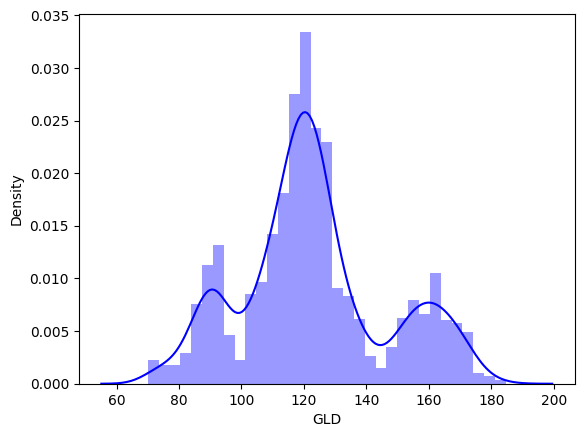

In [21]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='blue')

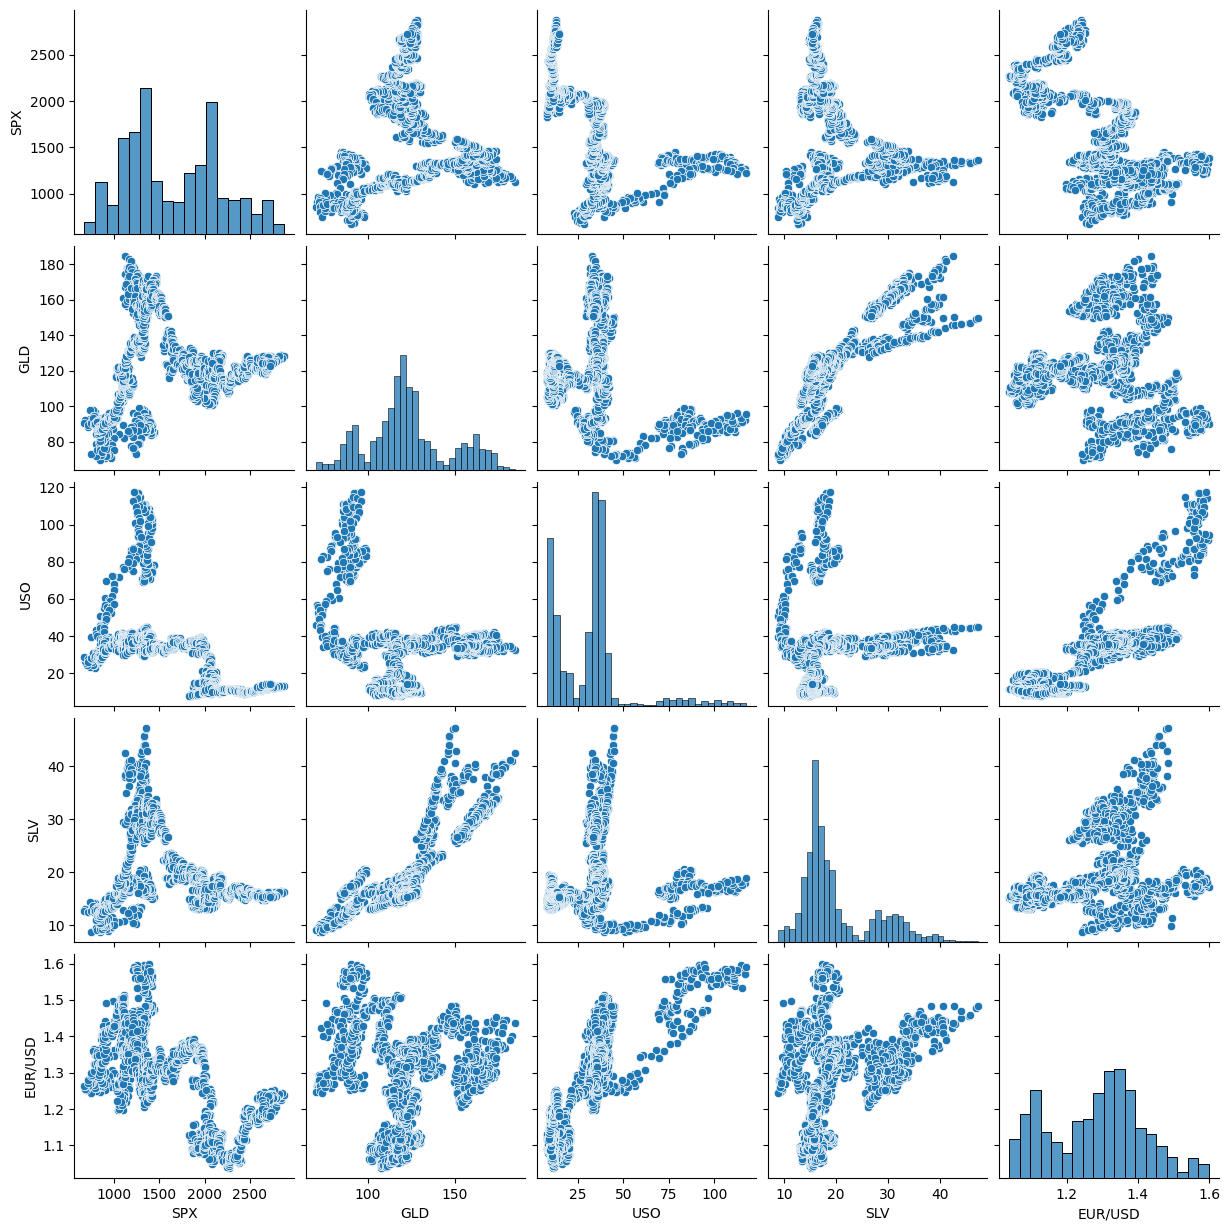

In [22]:
# pairplot
sns.pairplot(gold_data)

<h2>Splitting the Features and Target

In [23]:
X = gold_data.drop(['Date','GLD'],axis=1) # features or independent variables or input variables or predictors
Y = gold_data['GLD'] # target variable or dependent variable or output variable

In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(Y) # GLD column is the target column

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


<h2>Splitting into Training data and Test Data </h2>

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## Model Training: Random Forest Regressor

In [27]:
regressor = RandomForestRegressor(n_estimators=100)

**the RandomForestRegressor you're is a regression model. In the context of machine learning, regression models are used to predict continuous outcomes based on one or more input features. The RandomForestRegressor is part of an ensemble of decision trees designed to predict a continuous value (like the price of a house, stock prices, temperature, etc.) as opposed to classifying inputs into categories (which would be the job of classification models, such as RandomForestClassifier).**

**RandomForestRegressor Explained**

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during the training process and outputting the average prediction of the individual trees for regression tasks, or the majority vote for classification tasks.

**Parameters:**

- *n_estimators=100*: This parameter specifies the number of trees in the forest. Here, it's set to 100, meaning the model will build 100 individual decision trees. Increasing the number of trees can improve the model's accuracy but also increases computational cost and time.

**Typical Usage:**

Here's how you might typically use this regressor in a machine learning workflow:

1. *Import the Model:* Ensure you've imported RandomForestRegressor from `sklearn.ensemble`.

2. *Instantiate the Model:* Create an instance of the model with the desired parameters.

3. *Train the Model:* Fit the model to your training data using the `.fit()` method, passing in your features (`X_train`) and target (`Y_train`) data.

4. *Predict:* Use the `.predict()` method to generate predictions on new data (e.g., `X_test`).

5. *Evaluate:* Assess the model's performance using suitable metrics for regression, such as Mean Squared Error (MSE) or R-squared.

In [28]:
# training the model
regressor.fit(X_train,Y_train) # training the algorithm or fitting the model

RandomForestRegressor()

In [29]:
regressor_model = regressor.fit(X_train,Y_train) # training the algorithm or fitting the model

<h2>Model Evaluation

In [30]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test) # predicting the values of Y_test

The line `test_data_prediction = regressor.predict(X_test)` is used for making predictions on the test dataset using the trained `RandomForestRegressor` model. Here's an overview of the process and its significance:

### Making Predictions

- **Method**: The `.predict()` method of the RandomForestRegressor takes an array of input features (`X_test`) and returns predictions based on the model learned from the training data (`X_train` and `Y_train`).

- **Input**: `X_test` is the portion of your dataset reserved for testing. It contains the same features as `X_train` but includes different data points that the model has not seen during the training phase. This ensures that you're evaluating the model's performance on unseen data.

- **Output**: `test_data_prediction` will contain the model's predicted values corresponding to each input in `X_test`. In the context of a regression task, these predictions represent continuous values that the model believes are the most likely outcomes based on its training.

### Why It's Important

- **Evaluation**: Predictions on the test set allow you to evaluate how well the model generalizes to new data. This is crucial for understanding the model's performance and ensuring that it has not overfitted to the training data.

- **Metrics**: You can compare `test_data_prediction` against the actual target values in `Y_test` using various regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared. These metrics give you quantitative insight into the accuracy and performance of your model.

In [31]:
print(test_data_prediction) # predicted values of GLD

[168.59269906  81.73540001 115.93580009 127.71020077 120.8222012
 154.63629713 149.8920981  126.27880032 117.60689884 126.11340057
 116.70160103 172.06500088 141.30309852 167.6631988  115.31860049
 117.55920074 139.07690276 169.94670037 159.58180275 157.04389926
 154.91220026 125.08730041 175.54519999 156.9604042  125.40100062
  93.91709999  78.16729968 120.70909996 119.14289983 167.47390027
  88.14130026 125.16710005  90.99150075 117.7197004  121.1880996
 136.29820135 115.55670158 114.93670081 148.25999945 107.38180093
 104.68640235  87.30989796 126.55350043 117.83009974 153.65749895
 119.61780009 108.4408     108.02619821  93.19490045 127.15199769
  74.89820043 113.71739936 121.39090015 111.38009917 118.80149874
 120.9453994  159.24790017 168.34500109 146.84679652  85.73939867
  94.33990027  86.91159873  90.36950029 118.99170092 126.41090059
 127.61570016 169.23309995 122.3143995  117.32799877  98.45350026
 168.04490088 142.89409828 132.02090263 121.15550175 121.17469956
 119.6279003

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893058520486036


In [33]:
# Mean Absolute Error
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.3248461697598266


In [34]:
# Mean Squared Error
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.6405588319920845


In [35]:
# Root Mean Squared Error
rmse = metrics.mean_squared_error(Y_test, test_data_prediction, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 2.374986069852218


In [36]:
import joblib

# Save the model to disk
model_filename = 'Forest_regressor_model.pkl'
joblib.dump(regressor_model, model_filename)

['Forest_regressor_model.pkl']

<h2>Compare the Actual Values and Predicted Values in a Plot

In [37]:
Y_test = list(Y_test)

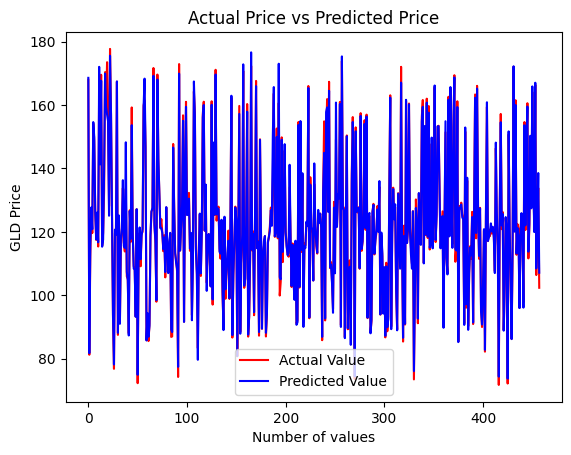

In [38]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## LinearRegression Model

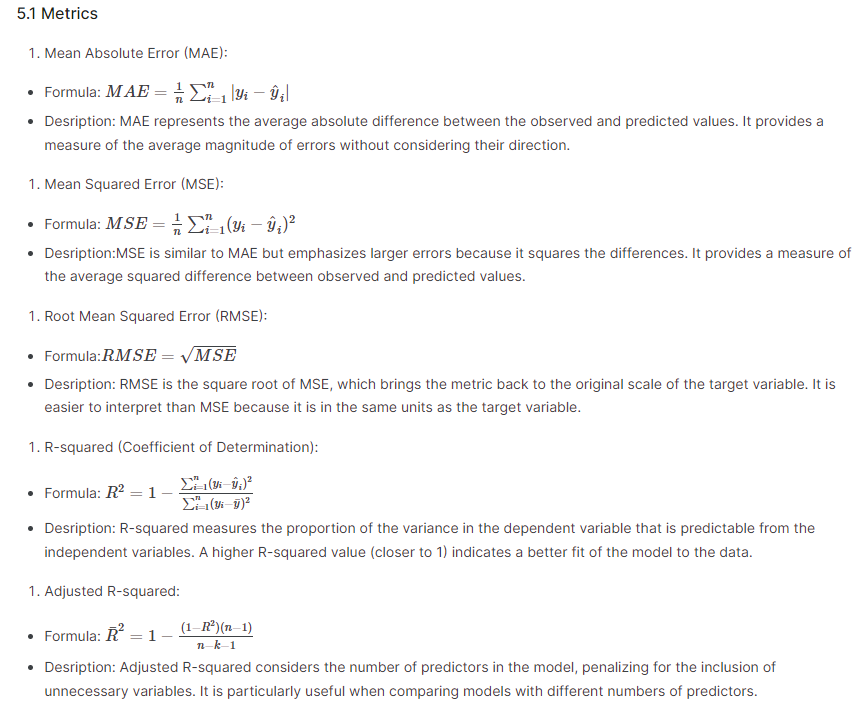

In [40]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
gold_data.head() # prints the first 5 rows of the dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [42]:
linear = LinearRegression().fit(X_train, Y_train)

In [43]:
# Assuming X_train is a DataFrame for clarity in printing
feature_names = X_train.columns # feature names are the column names of X_train
coefficients = linear.coef_
equation_parts = [f"{coefficients[i]} * {feature_names[i]}" for i in range(len(feature_names))] # constructing the equation parts
equation = " + ".join(equation_parts) # joining the equation parts with a ' + ' sign between them and assigning it to the variable 'equation' 
print(f"Linear Regression model\nGold ETF Price = {linear.intercept_} + {equation}") # printing the equation of the linear regression model

Linear Regression model
Gold ETF Price = 67.45629268976202 + 0.0068277000374907405 * SPX + -0.25676405312527956 * USO + 3.177234857701693 * SLV + -8.999752608880971 * EUR/USD


In [44]:
predicted_price_linear_reg = linear.predict(X_test) # predicting the values of Y_test using the linear regression model

In [45]:
predicted_price_linear_reg # printing the predicted values of GLD

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, predicted_price_linear_reg)
print("R squared error : ", error_score)

R squared error :  0.8657886565869237


In [47]:
mse = metrics.mean_squared_error(Y_test, predicted_price_linear_reg)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 70.78890079721528


In [48]:
# Root Mean Squared Error
rmse = metrics.mean_squared_error(Y_test, predicted_price_linear_reg, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 8.41361401522647


In [54]:
def evaluate_print_test_model (y_true, y_pred, model):
    """
    Evaluate and print regression metrics for a given dataset.
    Parameters:
    - y_true (array-like): y target values.
    - y_pred (array-like): y predicted  values.
    - model (object, optional): Regression model object with 'coef_' and 'intercept_' attributes.

    Returns:
    None

    Prints:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - R-squared Score (R2)
    - Explained Variance Score (EVS)
    - Coefficients and Intercept of the regression model if provided.

    Example:
    evaluate_print_test_model(y_test, y_pred, linear_regression_model)
    """
    
    # Calculate Mean Absolute Error (MAE).
    mae = metrics.mean_absolute_error(y_true, y_pred)

    # Calculate Mean Squared Error (MSE)
    mse = metrics.mean_squared_error(y_true, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    #  # Calculate R-squared Score (R2) (coefficient of determination) 
    r2 = metrics.r2_score(y_true, y_pred)
    
    # Calculate Explained Variance Score (EVS)
    variance_score = metrics.explained_variance_score(y_true, y_pred)
    
    print(f'Mean Absolute Error(test):          {mae}')
    print(f'Mean Squared Error(test):           {mse}')
    print(f'Root Mean Squared Error(test) :     {rmse}')
    print(f'R-squared Score(test):              {r2}')
    print(f'Explained Variance Score(test):     {variance_score}')
    
    if model is not None:
        print(f'Linear Regression coef_:      {model.coef_}')
        print(f'Linear Regression intercept_: {model.intercept_}')

In [55]:
evaluate_print_test_model(Y_test, predicted_price_linear_reg, linear) # evaluating the linear regression model

Mean Absolute Error(test):          5.911486735777764
Mean Squared Error(test):           70.78890079721528
Root Mean Squared Error(test) :     8.41361401522647
R-squared Score(test):              0.8657886565869237
Explained Variance Score(test):     0.8663096646544547
Linear Regression coef_:      [ 6.82770004e-03 -2.56764053e-01  3.17723486e+00 -8.99975261e+00]
Linear Regression intercept_: 67.45629268976202


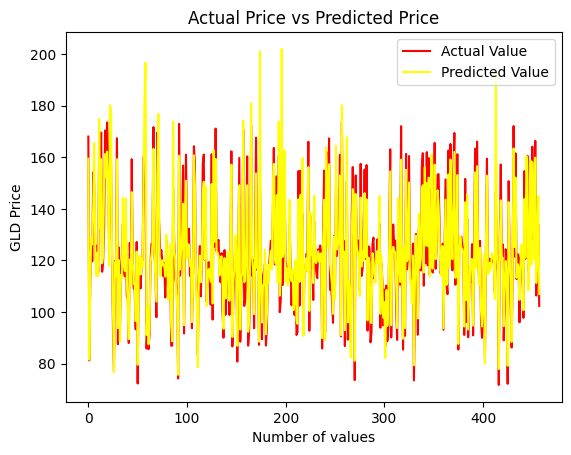

In [56]:
plt.plot(Y_test, color='red', label = 'Actual Value') # plotting the actual values of GLD
plt.plot(predicted_price_linear_reg, color='yellow', label='Predicted Value') # plotting the predicted values of GLD
plt.title('Actual Price vs Predicted Price') # title of the plot 
plt.xlabel('Number of values') # x-axis label
plt.ylabel('GLD Price') # label for y-axis
plt.legend()    # legend is used to show the labels of the plot
plt.show() # displaying the plot

In [57]:
def plot_line_chart_actual_predicted(y_true, y_pred):   
    plt.plot(y_pred, label='Predicted GLD Price')
    plt.plot(y_true, label='Actual GLD Price')
    plt.title('Actual vs Predicted GLD Prices')
    plt.xlabel('GLD Price')
    plt.ylabel('GLD Price')
    plt.legend()
    
    #plt.show()

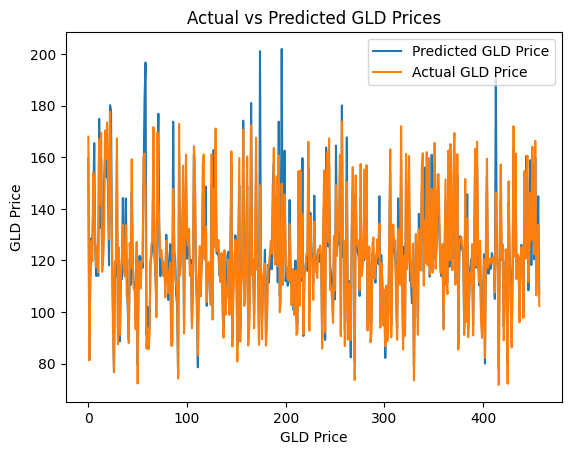

In [58]:
plot_line_chart_actual_predicted(Y_test,predicted_price_linear_reg)

## Gradio UI

In [59]:
import joblib

# Save the model to disk
model_filename = 'linear_regression_model.pkl'
joblib.dump(linear, model_filename)

['linear_regression_model.pkl']